In [2]:
import pymc3 as pm
import arviz as az
import numpy as np
from autograd import grad
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob
import pickle

*** Start script ***
pymc3: v. 3.9.3
[ 0.33986514  0.19129984 -1.14082153  0.77841149  1.70735116  1.00835824
 -1.29208536 -0.47329255  0.21080198 -0.99206881  0.92498657  0.12008536
 -0.17398908  1.08695708  1.13088784 -0.28638654  0.51030498  1.39581499
 -0.25065223  0.67537929 -1.22929768 -0.62835937  0.98754454  0.79675293
  0.54024055  2.10318544 -0.63163463 -0.04076872 -1.22578924 -1.68198686
  1.82366378 -0.04382343  0.28503084  1.89016131 -1.76142357  1.75232781
 -0.38412584 -0.00498259 -0.72159482  0.85355718 -0.28341598  0.44669669
 -0.79516275  0.00433095 -0.8160467  -0.30853458  0.24638834  0.1311734
 -2.29463361 -1.2557879 ]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 28 seconds.
The acceptance probability does not match the target. It is 0.9107198811636108, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8810189637169683, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8899563823108768, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.922461337133764, but should be close to 0.8. Try to increase the number of tuning steps.


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
alpha  20.406  0.296  19.853   20.960      0.005    0.004    3192.0  3192.0   
beta    2.931  0.051   2.835    3.027      0.001    0.001    2988.0  2982.0   
sigma   1.037  0.111   0.837    1.245      0.002    0.001    4254.0  4234.0   

       ess_bulk  ess_tail  r_hat  
alpha    3198.0    3430.0    1.0  
beta     3001.0    3044.0    1.0  
sigma    4252.0    4126.0    1.0  


/Users/leo/Library/Python/3.7/lib/python/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


{'alpha': array([19.62671258]), 'beta': array([3.08121749]), 'sigma': array([1.07891012])}


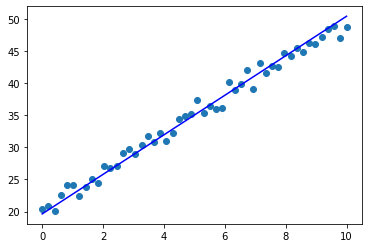

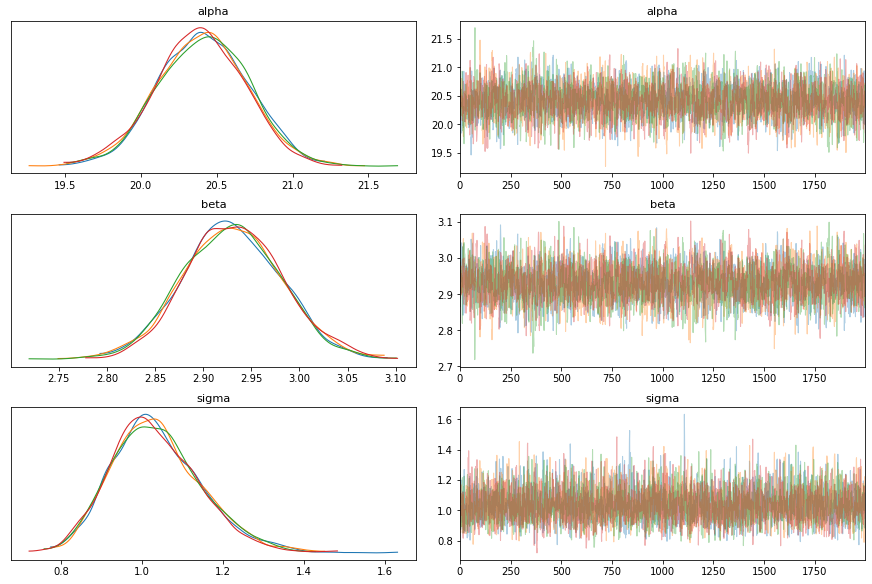

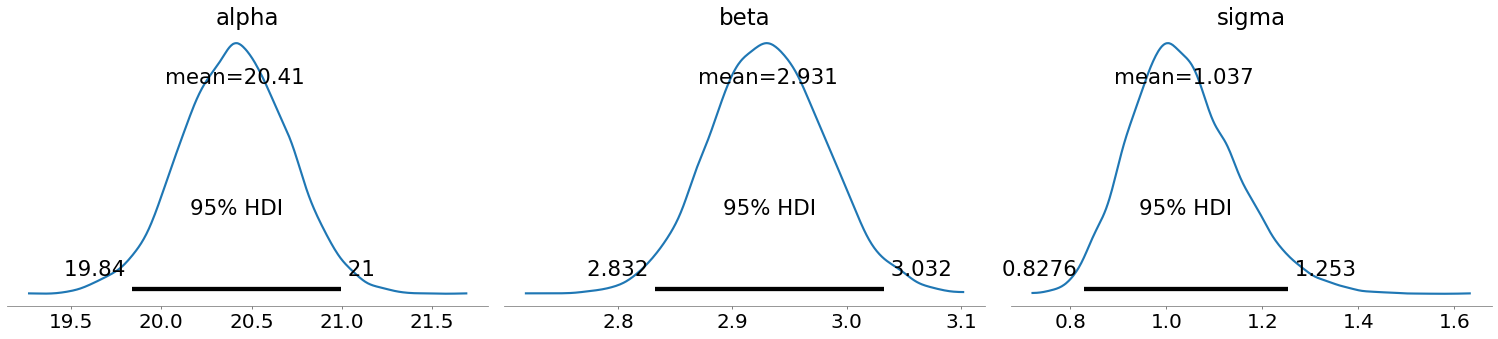

In [3]:
print("*** Start script ***")
print(f"{pm.__name__}: v. {pm.__version__}")
# print(f'{theano.__name__}: v. {theano.__version__}')

if __name__ == "__main__":
    np.random.seed(7000)

    a_true = 20
    b_true = 3

    x = np.linspace(0, 10)
    y = a_true + b_true * x

    # add noise
    noise = 1 * np.random.randn(len(y))
    print(noise)
    y = y + noise

    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x, y, "o")
    # plt.show()

    # PYMC3 magic
    with pm.Model() as basic_model:

        # set up priors
        alpha = pm.Normal("alpha", mu=0, sd=10)
        beta = pm.Normal("beta", mu=0, sd=10)
        sigma = pm.HalfNormal("sigma", sd=10)

        # Likelihood function
        mu = alpha + beta * x
        y_likelihood = pm.Normal("y_like", mu=mu, sigma=sigma, observed=y)

        trace = pm.sample(2000, tune=500, cores=4, model=basic_model)

        summary = az.summary(trace, var_names=["alpha", "beta", "sigma"])
        print(summary)

        # sample posterior predictive
        ppc = pm.sample_posterior_predictive(
            trace, var_names=["alpha", "beta", "sigma"], model=basic_model
        )

        # plot posterior
        data_spp = az.from_pymc3(trace=trace, posterior_predictive=ppc)

        # joint_plt = az.plot_pair(data_spp, var_names=['JND', 'eps'], kind='kde', fill_last=False);
        # plt.show()
        trace_fig = az.plot_trace(
            trace, var_names=["alpha", "beta", "sigma"], figsize=(12, 8)
        )
        # az.plot_ppc(data_spp);
        # plt.show()
        # fig, _ = plt.subplots()
        ax_posterior = az.plot_posterior(
            data_spp, point_estimate="mean", hdi_prob=0.95, textsize=20, round_to=4
        )

        # try sampling just one sample
        ppc1 = pm.sample_posterior_predictive(
            trace, samples=1, var_names=["alpha", "beta", "sigma"], model=basic_model
        )
        print(ppc1)

        a_s = ppc1["alpha"]
        b_s = ppc1["beta"]

        y_s = a_s + b_s * x
        ax.plot(x, y_s, "b")

        plt.show()